In [1]:
import os
from glob import glob

import numpy as np
import tensorflow as tf

from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.getcwd()

'C:\\Users\\MY'

In [3]:
data_paths = glob('E:\\dataset\\mnist_png\\training\\*\\*.png')

In [4]:
data_paths[-1]

'E:\\dataset\\mnist_png\\training\\9\\9998.png'

In [5]:
len(data_paths)

60000

In [6]:
path = data_paths[0]

In [7]:
path

'E:\\dataset\\mnist_png\\training\\0\\1.png'

# **데이터 분석 (MNIST)**

In [8]:
os.listdir('E:\\dataset\\mnist_png\\training\\')

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [9]:
len(os.listdir('E:\\dataset\\mnist_png\\training\\'))

10

In [10]:
label_nums = os.listdir('E:\\dataset\\mnist_png\\training\\')
label_nums

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

Label 0의 데이터 갯수 확인

In [11]:
len(label_nums)

10

## **데이터 별 갯수 비교**

In [12]:
lbl_n = label_nums[0]
'E:\\dataset\\mnist_png\\training\\' + lbl_n

'E:\\dataset\\mnist_png\\training\\0'

In [13]:
nums_dataset = []

for lbl_n in label_nums:
    data_per_class = os.listdir('E:\\dataset\\mnist_png\\training\\' + lbl_n)
    nums_dataset.append((len(data_per_class)))

In [14]:
nums_dataset

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]

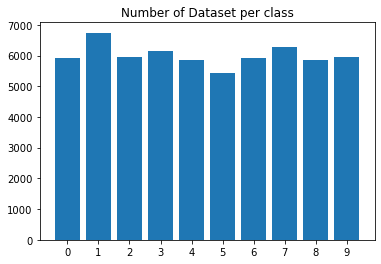

In [15]:
plt.bar(label_nums , nums_dataset)
plt.title('Number of Dataset per class')
plt.show()

# **Pillow로 열기**

In [16]:
image_pil = Image.open(path)
image = np.array(image_pil)

In [17]:
image.shape

(28, 28)

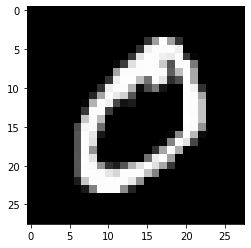

In [18]:
plt.imshow(image, 'gray')
plt.show()

# **TensorFlow로 열기**

In [19]:
gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile)

In [20]:
image.shape

TensorShape([28, 28, 1])

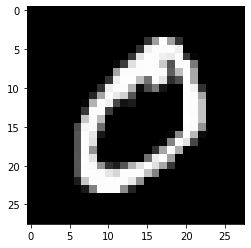

In [21]:
plt.imshow(image[:, :, 0], 'gray')
plt.show()

# **Label 얻기**

In [22]:
path

'E:\\dataset\\mnist_png\\training\\0\\1.png'

In [23]:
label = path.split('\\')[-2]

In [24]:
label

'0'

In [25]:
int(label)

0

In [26]:
# 각 파일 라벨인 문자열이라서 정수형 변경 해주는 함수 생성
def get_label(path):
    class_name = path.split('\\')[-2]
    label = int(class_name)
    return label

In [27]:
path, get_label(path)

('E:\\dataset\\mnist_png\\training\\0\\1.png', 0)

# **데이터 이미지 사이즈 알기**

In [28]:
from tqdm import tqdm_notebook #진행바 라이브러리 함수

In [29]:
heights = []
widths = []

In [30]:
len(data_paths)

60000

In [31]:
img_pil = Image.open(path)
image = np.array(image_pil)
image.shape

(28, 28)

In [32]:
h, w = image.shape

In [33]:
for path in tqdm_notebook(data_paths):
    img_pil = Image.open(path)
    image = np.array(img_pil)
    h, w = image.shape
    
    heights.append(h)
    widths.append(w)

<ipython-input-33-266541357494>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for path in tqdm_notebook(data_paths):


In [34]:
np.unique(heights)

array([28])

In [35]:
np.unique(widths)

array([28])

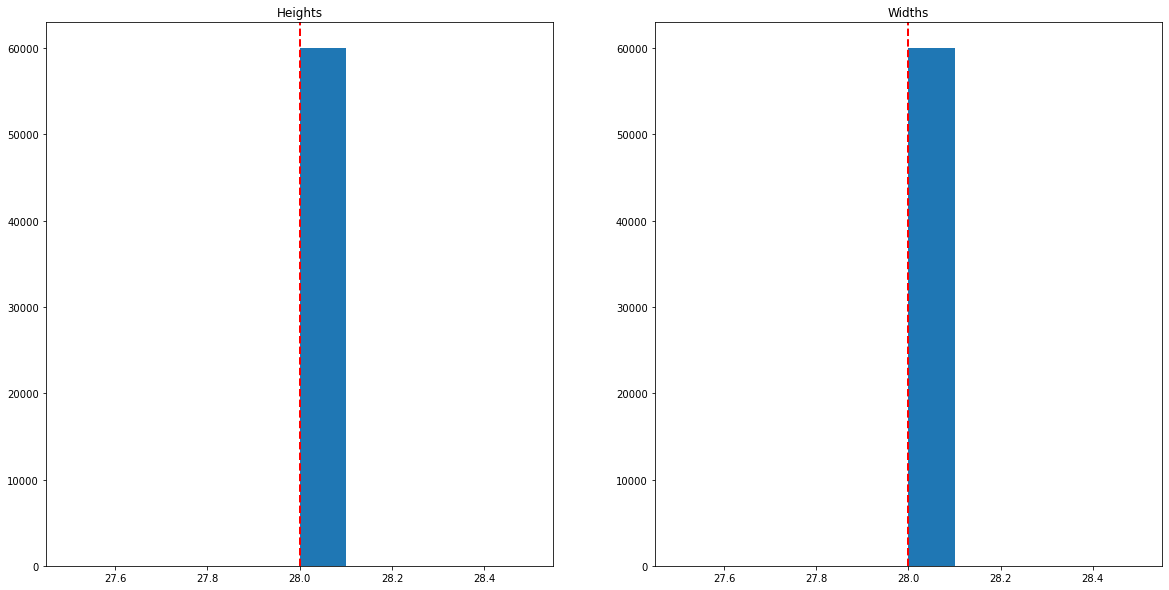

In [36]:
plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.hist(heights)
plt.title('Heights')
plt.axvline(np.mean(heights), color = 'r', linestyle = 'dashed', linewidth=2)

plt.subplot(122)
plt.hist(widths)
plt.title('Widths')
plt.axvline(np.mean(widths), color = 'r', linestyle = 'dashed', linewidth=2)

plt.show()

# **CIFAR**

In [47]:
data_paths = glob('E:\\dataset\\cifar\\train\\*.png')
os.listdir('E:\\dataset\\cifar\\train\\')[0]

'0_frog.png'

In [38]:
path = data_path[0]
path

'E:\\dataset\\cifar\\train\\0_frog.png'

In [39]:
gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile, dtype=tf.float32)

image.shape

TensorShape([32, 32, 3])

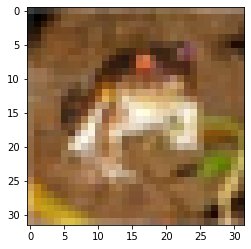

In [40]:
plt.imshow(image)
plt.show()

In [41]:
def read_image(path):
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile, dtype=tf.float32)
    return image

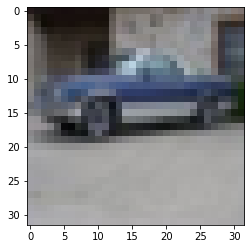

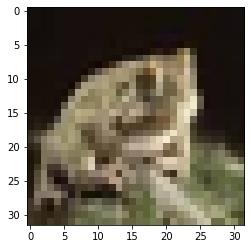

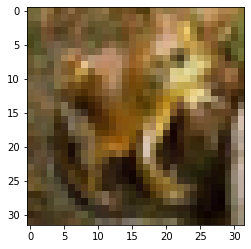

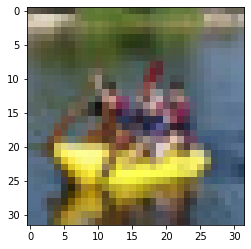

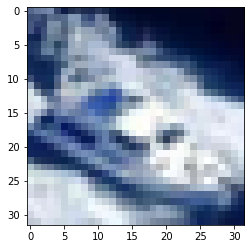

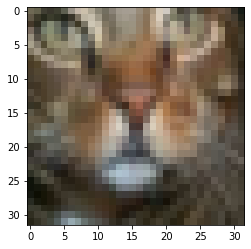

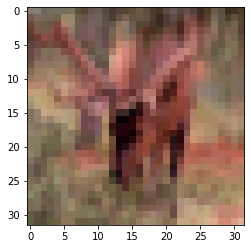

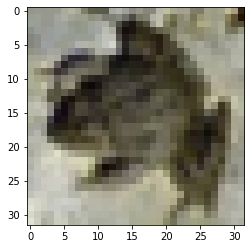

In [42]:
for i in range(8):
    plt.imshow(read_image(data_path[i+1]))
    plt.show()

## **Batch**
- 여러개의 이미지를 한 번에 학습하면 GPU의 RAM이나 메모리가 부족할수가 있어서 이미지를 여러개 나누어서 훈련 시킨다.

### **Images in List**

In [51]:
batch_images = []

In [52]:
for path in data_paths[:8]:
    image = read_image(path)
    batch_images.append(image)

In [53]:
image.shape

TensorShape([32, 32, 3])

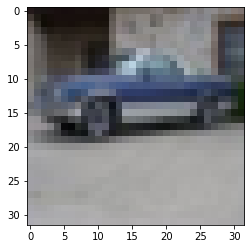

In [54]:
plt.imshow(batch_images[1])
plt.show()

## **Batch Size**

(batch_size, height, width, channel)

In [59]:
import cv2

def make_batch(batch_paths):
    batch_images = []
    for path in data_paths[:8]:
        image = read_image(path)
   #     image = cv2.resize(image, (32, 32))
        batch_images.append(image)
    
    return tf.convert_to_tensor(batch_images)

In [60]:
batch_images = make_batch(data_paths[:8])

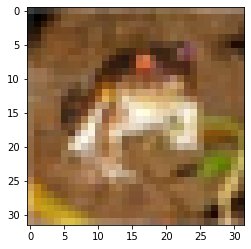

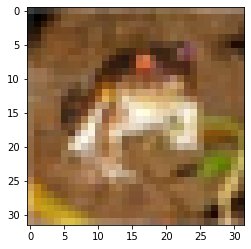

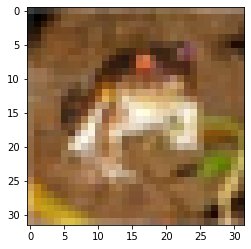

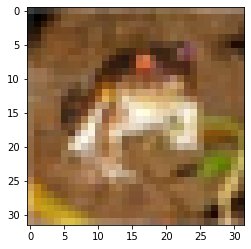

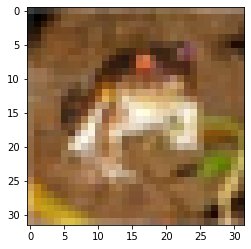

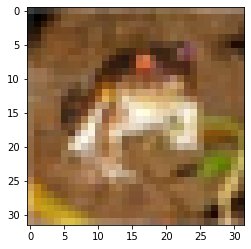

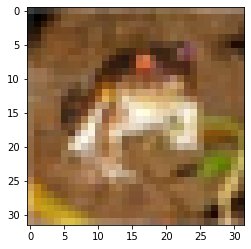

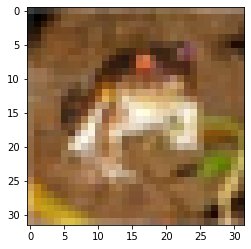

In [63]:
batch_size = 16

for step in range(8):
    batch_image = make_batch(data_paths[step + batch_size: (step + 1) * batch_size])
    
    plt.imshow(batch_images[0])
    plt.show()

In [64]:
batch_images.shape

TensorShape([8, 32, 32, 3])